In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from VelocityDispersionLibrary import Sigma
from tqdm.notebook import tqdm
import sys
sys.path.insert(1, "/Users/chris/Documents/PhD/ProjectSigma/GalaxyTools")
sys.path.insert(1, "/Users/chris/Documents/PhD/EuclidAGN")
import AGNCatalogToolbox
from AGNCatalogToolbox.main import stellar_mass_to_black_hole_mass
from darkmatter import getC
from SDSSExtractor import Assign_Size, AssignSersicIndex
from Utility import binnedMean
import scipy.io as sio
import scipy.stats as stats
from HM2SM import stellar_mass_to_halo_mass
from colossus.cosmology import cosmology
cosmo = cosmology.setCosmology('planck18')

In [2]:
df = pd.read_csv("/Users/chris/data/MANGa/MANGa.csv")

print(list(df))

high = 10.9
low = 10.4

df = df[(df['Mstar'] > low) & (df['Mstar'] < high)]

#df = df[(df['TTYPE'] > -8) & (df['TTYPE'] < 0) & (df['P_S0'] < 0.5)]

print(len(df))


full_sample = len(df)
df['anisotropy'] = np.ones(full_sample)*0.35


print(df['full_radius'])


['Unnamed: 0', 'INTID', 'z', 'Total_n', 'BT', 'FLAG_FIT', 'Bulge_n', 'Disk_angle', 'BA_SE_DISK', 'disk_radius', 'bulge_radius', 'full_radius', 'TTYPE', 'P_S0', 'cont', 'Vmax', 'sigma_re', 'sigma_ap', 'catmasssetrunc', 'catmassstrunc', 'abs_mag', 'sdss_ap_kpc', 'Mstar', 'ap_reduced', 'Sigma_reduced']
412
0       4.277199
4       3.671069
5       4.761319
18      4.181664
21      7.061461
          ...   
1406    6.495288
1408    5.159075
1409    4.767282
1411    4.137021
1412    5.142606
Name: full_radius, Length: 412, dtype: float64


In [3]:
# Modelling sigma
sigma = Sigma(df['ap_reduced'],
              df['anisotropy'], 
              df['bulge_radius'], 
              df['Bulge_n'],
              np.log10(df['BT'] * (10**df['Mstar'])), 
              df['z'], 
              DM = 'NFW', 
              HaloMass=stellar_mass_to_halo_mass(df['Mstar'], df['z']),
              haloC=getC(stellar_mass_to_halo_mass(df['Mstar'], df['z']),  df['z']),
              BlackHole=True, 
              BHMass=stellar_mass_to_black_hole_mass(df['Mstar']),
              disk_mass = np.log10((1-df['BT'])*((10**df['Mstar']))),
              disk_inclination = df['Disk_angle'], 
              disk_scale_length = df['disk_radius'])

[1, 1, 1]


/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  
/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  del sys.path[0]


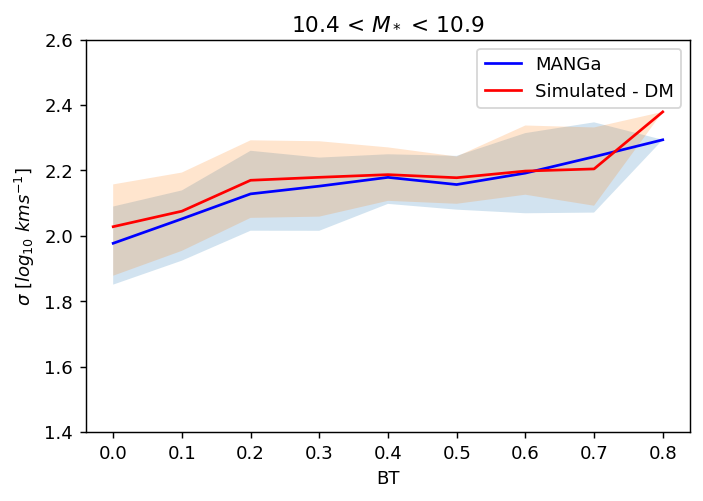

In [4]:
plt.figure(dpi = 130)

bins = np.arange(0, 1, 0.1)

# MANGa data
array, std_up, std_down = binnedMean(bins, df['BT'], 10**df['sigma_re'] , df["Vmax"])
plt.plot(bins[:-1], np.log10(array), 'b', label = "MANGa")
plt.fill_between(bins[:-1], np.log10(array+std_up), np.log10(array-std_down), 'b', alpha = 0.2)

array_sim, std_up_sim, std_down_sim = binnedMean(bins, df['BT'], sigma , df["Vmax"])
plt.plot(bins[:-1], np.log10(array_sim), 'r', label = "Simulated - DM")

plt.fill_between(bins[:-1], np.log10(array_sim+std_up_sim), np.log10(array_sim-std_down_sim), 'r', alpha = 0.2)



plt.xlabel("BT")
plt.ylabel(r"$\sigma$ [$log_{10}$ $kms^{-1}$]")

plt.title("{} < $M_*$ < {}".format(low, high))

plt.ylim(1.4, 2.6)

#plt.xlim(0., 1)

plt.legend()

plt.show()

/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  if __name__ == '__main__':
/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: The parameter where must 

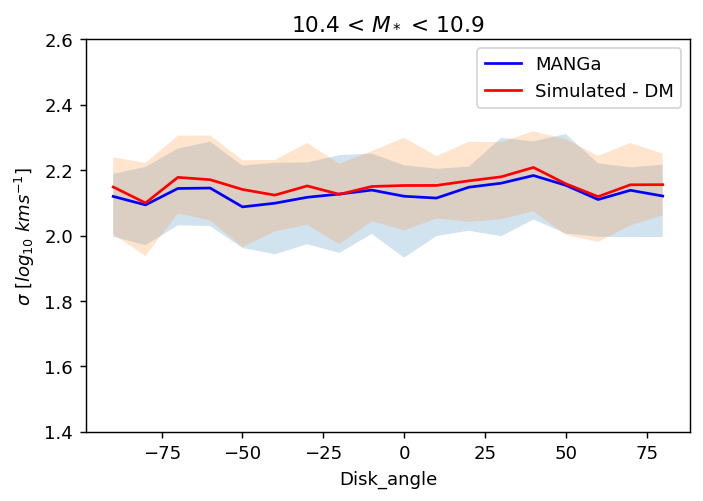

In [5]:
plt.figure(dpi = 130)

name = 'Disk_angle'
bins = np.arange(-100, 100, 10)

# MANGa data
array, std_up, std_down = binnedMean(bins, df[name], 10**df['sigma_re'] , df["Vmax"])
plt.plot(bins[:-1], np.log10(array), 'b', label = "MANGa")
plt.fill_between(bins[:-1], np.log10(array+std_up), np.log10(array-std_down), 'b', alpha = 0.2)


array_sim, std_up_sim, std_down_sim = binnedMean(bins, df[name], sigma , df["Vmax"])
plt.plot(bins[:-1], np.log10(array_sim), 'r', label = "Simulated - DM")

plt.fill_between(bins[:-1], np.log10(array_sim+std_up_sim), np.log10(array_sim-std_down_sim), 'r', alpha = 0.2)



plt.xlabel(name)
plt.ylabel(r"$\sigma$ [$log_{10}$ $kms^{-1}$]")

plt.title("{} < $M_*$ < {}".format(low, high))

plt.ylim(1.4, 2.6)

#plt.xlim(0., 1)

plt.legend()

plt.show()